# Day061
## 降維方法-T-SNE
### PCA 的問題
1. 求共變異數矩陣進行奇異值分解，因此會被資料的差異性影響，無法很好的表現相似性及分佈。
2. PCA 是一種線性降維方式，因此若特徵間是非線性關係，會有underfitting 的問題。
### t-SNE
1. 用了更複雜的公式來表達高維和低維之間的關係，對於特徵非線性資料有更好的降維呈現能力。
2. 主要是將高維的資料用 gaussian distribution 的機率密度函數近似，而低維資料的部分用 t 分佈來近似，再用 Kullback–Leibler divergence(相對熵) 計算相似度，再以梯度下降 (gradient descent) 求最佳解。
### t-SNE 優劣
- 優點: 當特徵數量過多時，使用 PCA 可能會造成降維後的 underfitting，這時可以考慮使用t-SNE 來降維。
- 缺點: t-SNE 的需要比較多的時間執行。

## t-SNE 範例
#### 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline

#### 載入 digits (4個數字) 資料集

In [2]:
digits = datasets.load_digits(n_class=4)
X = digits.data
y = digits.target

#### 設定 模型 估計參數

In [3]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

#### 資料建模 並 視覺化 結果

Computing t-SNE embedding


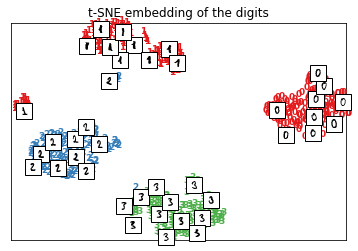

In [4]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(n_samples):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]]) # just something big
        for i in n_samples:
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

Computing t-SNE embedding


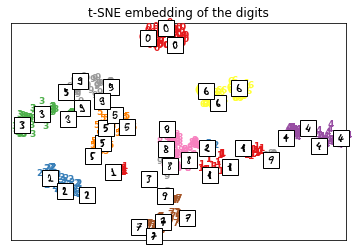

In [6]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()            